In [112]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
path = os.getcwd()

In [3]:
os.listdir(path)

['user_table.csv',
 '_DS_Store',
 '.ipynb_checkpoints',
 'test_table.csv',
 'Untitled.ipynb',
 'Spanish Tranlation Test.pdf']

In [4]:
user = pd.read_csv('user_table.csv')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [5]:
test = pd.read_csv('test_table.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [6]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [8]:
test['source'].value_counts()

Ads       181877
SEO       180610
Direct     90834
Name: source, dtype: int64

In [9]:
test['conversion'].value_counts()

0    430846
1     22475
Name: conversion, dtype: int64

In [10]:
22475.0/(22475+430846)

0.04957855471067963

In [11]:
test['test'].value_counts()

0    237338
1    215983
Name: test, dtype: int64

In [12]:
gp = test.groupby('test')

In [13]:
gp['conversion'].value_counts()

test  conversion
0     0             224242
      1              13096
1     0             206604
      1               9379
Name: conversion, dtype: int64

In [14]:
13096.0/(224242 + 13096)

0.055178690306651276

In [15]:
9379.0/(206604 + 9379)

0.043424713982118966

In [16]:
gp['browser_language'].value_counts()

test  browser_language
0     ES                  197773
      EN                   33003
      Other                 6562
1     ES                  179774
      EN                   30134
      Other                 6075
Name: browser_language, dtype: int64

In [139]:
combine = test.merge(user, how='inner', on='user_id')

In [140]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
user_id             452867 non-null int64
date                452867 non-null object
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


In [19]:
gpcom = combine.groupby('test')

In [20]:
gpcom['country'].value_counts()

test  country    
0     Mexico         64209
      Spain          51782
      Colombia       27088
      Peru           16869
      Venezuela      16149
      Chile           9853
      Argentina       9356
      Ecuador         8036
      Guatemala       7622
      Bolivia         5550
      Honduras        4361
      El Salvador     4108
      Paraguay        3650
      Nicaragua       3419
      Costa Rica      2660
      Panama          1966
      Uruguay          415
1     Mexico         64275
      Argentina      37377
      Colombia       26972
      Peru           16797
      Venezuela      15905
      Chile           9884
      Ecuador         7859
      Guatemala       7503
      Bolivia         5574
      Honduras        4207
      El Salvador     4067
      Uruguay         3719
      Paraguay        3697
      Nicaragua       3304
      Costa Rica      2649
      Panama          1985
Name: country, dtype: int64

In [21]:
combine.groupby([ 'country'])['test'].value_counts()

country      test
Argentina    1       37377
             0        9356
Bolivia      1        5574
             0        5550
Chile        1        9884
             0        9853
Colombia     0       27088
             1       26972
Costa Rica   0        2660
             1        2649
Ecuador      0        8036
             1        7859
El Salvador  0        4108
             1        4067
Guatemala    0        7622
             1        7503
Honduras     0        4361
             1        4207
Mexico       1       64275
             0       64209
Nicaragua    0        3419
             1        3304
Panama       1        1985
             0        1966
Paraguay     1        3697
             0        3650
Peru         0       16869
             1       16797
Spain        0       51782
Uruguay      1        3719
             0         415
Venezuela    0       16149
             1       15905
Name: test, dtype: int64

In [22]:
combine[combine['country'] != 'Spain'].groupby('test')['conversion'].value_counts()

test  conversion
0     0             176588
      1               8968
1     0             206604
      1               9379
Name: conversion, dtype: int64

In [23]:
8968.0/(8968+176588)

0.04833042316066309

In [24]:
9379.0/(9379+206604)

0.043424713982118966

In [25]:
combine.groupby([ 'sex'])['test'].value_counts()

sex  test
F    0        98473
     1        89909
M    0       138620
     1       125865
Name: test, dtype: int64

In [26]:
combine.groupby([ 'browser'])['test'].value_counts()

browser      test
Android_App  0       80944
             1       74191
Chrome       0       53127
             1       48802
FireFox      0       21388
             1       19378
IE           0       32471
             1       29244
Iphone_App   0       24456
             1       22165
Opera        0        3203
             1        2887
Safari       0       21749
             1       19316
Name: test, dtype: int64

In [27]:
gpcom['source'].value_counts()

test  source
0     Ads       95348
      SEO       94250
      Direct    47740
1     Ads       86529
      SEO       86360
      Direct    43094
Name: source, dtype: int64

In [28]:
gpcom['ads_channel'].value_counts()

test  ads_channel
0     Facebook       35789
      Google         35771
      Yahoo          14399
      Bing            7174
      Other           2215
1     Facebook       32636
      Google         32409
      Yahoo          13036
      Bing            6515
      Other           1933
Name: ads_channel, dtype: int64

In [29]:
gpcom['browser_language'].value_counts()

test  browser_language
0     ES                  197773
      EN                   33003
      Other                 6562
1     ES                  179774
      EN                   30134
      Other                 6075
Name: browser_language, dtype: int64

In [30]:
gpcom['device'].value_counts()

test  device
0     Web       131938
      Mobile    105400
1     Web       119627
      Mobile     96356
Name: device, dtype: int64

In [31]:
gpcover = combine.groupby('conversion')

In [32]:
gpcover['browser_language'].value_counts()

conversion  browser_language
0           ES                  358754
            EN                   60083
            Other                12009
1           ES                   18793
            EN                    3054
            Other                  628
Name: browser_language, dtype: int64

In [37]:
3054.0/60083

0.050829685601584476

In [33]:
gpcover['country'].value_counts()

conversion  country    
0           Mexico         122016
            Colombia        51285
            Spain           47654
            Argentina       46079
            Peru            31974
            Venezuela       30462
            Chile           18756
            Ecuador         15115
            Guatemala       14374
            Bolivia         10583
            Honduras         8146
            El Salvador      7760
            Paraguay         6988
            Nicaragua        6364
            Costa Rica       5025
            Uruguay          4081
            Panama           3761
1           Mexico           6468
            Spain            4128
            Colombia         2775
            Peru             1692
            Venezuela        1592
            Chile             981
            Ecuador           780
            Guatemala         751
            Argentina         654
            Bolivia           541
            Honduras          422
            El Salvador 

In [34]:
combine.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [48]:
combine['date'] = pd.to_datetime(combine['date'])

In [54]:
combine.groupby('test')['date'].value_counts()

test  date      
0     2015-12-04    73907
      2015-12-03    52073
      2015-11-30    37142
      2015-12-01    37116
      2015-12-02    37100
1     2015-12-04    67256
      2015-12-03    47420
      2015-11-30    33883
      2015-12-01    33875
      2015-12-02    33549
Name: date, dtype: int64

In [40]:
combine.groupby('test')['date'].min()

test
0    2015-11-30
1    2015-11-30
Name: date, dtype: object

In [262]:
from scipy.stats import norm
import numpy as np
def two_sample_propotion(x1, x2, n1, n2, tail=2):
    p1 = 1.0 * x1 / n1
    p2 = 1.0 * x2 / n2
    p = 1.0*(x1 + x2)/(n1 + n2)
    se = np.sqrt(p*(1.0 - p)*(1.0/n1 + 1.0/n2))
#     print se
    z = (p1 - p2) / se
    if tail == 2:
        pval = 2*(1 - norm.cdf(abs(z)))
    elif tail ==1:
        pval = 1 - norm.cdf(abs(z))
    return z, pval

In [93]:
two_sample_propotion(8268, 9379, 185556, 215983)

0.000648826861869


(1.7466341039870927, 0.080700827507707462)

In [80]:
9680.0 / 185556

0.05216753971846774

In [69]:
9379.0/(206604 + 9379)

0.043424713982118966

In [70]:
206604 + 9379

215983

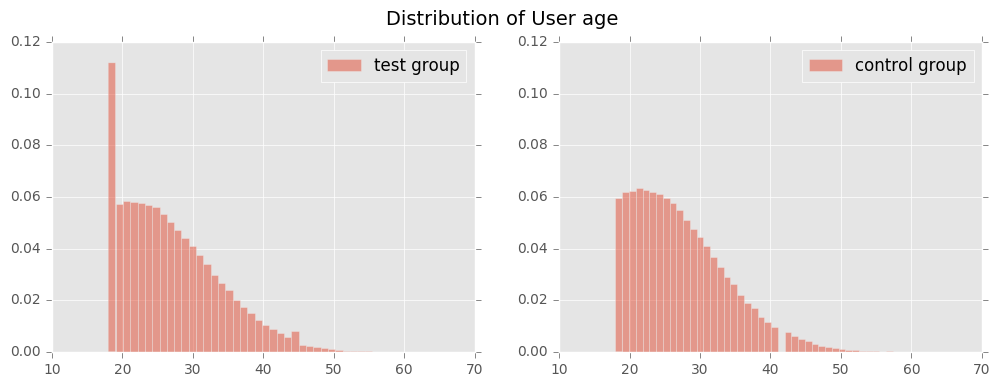

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Distribution of User age", fontsize=14)
combine[(combine['test'] ==1) & (combine['country'] != 'Spain')]['age'].hist(bins=50, normed =1, alpha=0.5, ax=axes[0], label='test group')
combine[(combine['test'] ==0) & (combine['country'] != 'Spain')]['age'].hist(bins=50, normed =1, alpha=0.5, ax=axes[1], label='control group')
axes[1].set_ylim(0, 0.12)
axes[0].legend()
axes[1].legend()

In [102]:
combine['age'].min()

18.0

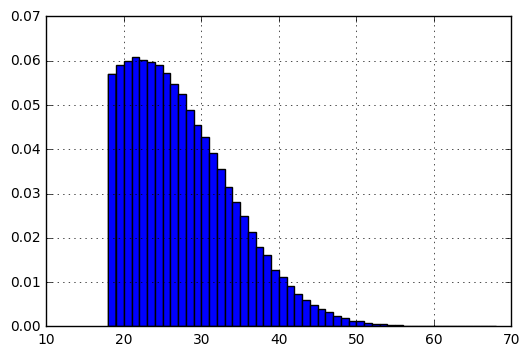

In [108]:
combine[combine['test'] ==0]['age'].hist(bins=50, normed =1)

In [106]:
combine[combine['age'] == 18].groupby('test').count()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,sex,age,country
test,,,,,,,,,,,
0,13495,13495,13495,13495,13495,5386,13495,13495,13495,13495,13495
1,12412,12412,12412,12412,12412,5004,12412,12412,12412,12412,12412


In [145]:
df_comb = combine[combine['country'] != 'Spain']
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401085 entries, 1 to 452866
Data columns (total 12 columns):
user_id             401085 non-null int64
date                401085 non-null object
source              401085 non-null object
device              401085 non-null object
browser_language    401085 non-null object
ads_channel         160800 non-null object
browser             401085 non-null object
conversion          401085 non-null int64
test                401085 non-null int64
sex                 401085 non-null object
age                 401085 non-null int64
country             401085 non-null object
dtypes: int64(4), object(8)
memory usage: 39.8+ MB


In [146]:
df_comb['country'].value_counts()

Mexico         128484
Colombia        54060
Argentina       46733
Peru            33666
Venezuela       32054
Chile           19737
Ecuador         15895
Guatemala       15125
Bolivia         11124
Honduras         8568
El Salvador      8175
Paraguay         7347
Nicaragua        6723
Costa Rica       5309
Uruguay          4134
Panama           3951
Name: country, dtype: int64

In [183]:
def check_category(df, cat):
    n_test = df[df['test'] ==1].shape[0]
    n_control = df[df['test'] ==0].shape[0]
    print n_test, n_control
    print (df[df['test'] ==1].groupby(cat)['user_id'].count()/(1.0*n_test))*100
    print (df[df['test'] ==0].groupby(cat)['user_id'].count()/(1.0*n_control))*100

In [171]:
check_category(df_comb, 'source')

source
Ads       40.064141
Direct    19.950040
SEO       39.985818
Name: user_id, dtype: float64
source
Ads       40.122821
Direct    20.094868
SEO       39.782312
Name: user_id, dtype: float64


In [172]:
check_category(df_comb, 'device')

device
Mobile    44.609638
Web       55.390362
Name: user_id, dtype: float64
device
Mobile    44.438808
Web       55.561192
Name: user_id, dtype: float64


In [173]:
check_category(df_comb, 'date')

date
2015-11-30    15.684930
2015-12-01    15.683076
2015-12-02    15.533382
2015-12-03    21.959550
2015-12-04    31.139062
Name: user_id, dtype: float64
date
2015-11-30    15.639654
2015-12-01    15.646670
2015-12-02    15.597023
2015-12-03    21.977648
2015-12-04    31.139004
Name: user_id, dtype: float64


In [174]:
check_category(df_comb, 'browser_language')

browser_language
EN       13.952561
ES       83.234310
Other     2.813129
Name: user_id, dtype: float64
browser_language
EN       13.910129
ES       83.328027
Other     2.761844
Name: user_id, dtype: float64


In [175]:
check_category(df_comb, 'ads_channel')

ads_channel
Bing         3.016119
Facebook    15.111645
Google      15.005515
Other        0.894454
Yahoo        6.036408
Name: user_id, dtype: float64
ads_channel
Bing         3.003060
Facebook    15.026631
Google      15.068183
Other        0.926011
Yahoo        6.098936
Name: user_id, dtype: float64


In [176]:
check_category(df_comb, 'browser')

browser
Android_App    34.344731
Chrome         22.595401
FireFox         8.971887
IE             13.541020
Iphone_App     10.264907
Opera           1.336120
Safari          8.945934
Name: user_id, dtype: float64
browser
Android_App    34.130732
Chrome         22.327331
FireFox         8.971944
IE             13.696435
Iphone_App     10.308077
Opera           1.345846
Safari          9.219636
Name: user_id, dtype: float64


In [177]:
check_category(df_comb, 'sex')

sex
F    41.668134
M    58.331866
Name: user_id, dtype: float64
sex
F    41.603575
M    58.396425
Name: user_id, dtype: float64


In [184]:
check_category(df_comb, 'country')

215774 185311
country
Argentina      17.322291
Bolivia         2.583258
Chile           4.580719
Colombia       12.500116
Costa Rica      1.227673
Ecuador         3.642237
El Salvador     1.884842
Guatemala       3.477249
Honduras        1.949725
Mexico         29.788112
Nicaragua       1.531232
Panama          0.919944
Paraguay        1.713367
Peru            7.784534
Uruguay         1.723563
Venezuela       7.371138
Name: user_id, dtype: float64
country
Argentina       5.048810
Bolivia         2.994965
Chile           5.317008
Colombia       14.617589
Costa Rica      1.435425
Ecuador         4.336494
El Salvador     2.216814
Guatemala       4.113086
Honduras        2.353341
Mexico         34.649319
Nicaragua       1.845007
Panama          1.060919
Paraguay        1.969662
Peru            9.103075
Uruguay         0.223948
Venezuela       8.714539
Name: user_id, dtype: float64


In [204]:
df_cou = (df_comb.groupby(['test', 'country']).count()/ df_comb.groupby(['test']).count())['user_id'].reset_index()

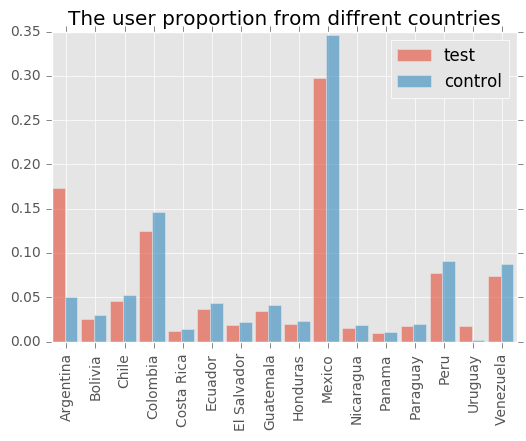

In [255]:
import numpy as np
colors = plt.rcParams['axes.prop_cycle']
plt.bar(np.arange(16), df_cou[df_cou['test'] == 1]['user_id'], 0.44, alpha=0.6, color='#E24A33', label='test')
plt.bar(np.arange(16)+0.44, df_cou[df_cou['test'] == 0]['user_id'],0.44, alpha=0.6, color='#348ABD', label='control')
plt.xticks(np.arange(16)+0.5, df_cou[df_cou['test']==1]['country'], rotation=90)
plt.legend()
plt.title('The user proportion from diffrent countries')

In [258]:
df_comb.groupby('test')['conversion'].value_counts()

test  conversion
0     0             176362
      1               8949
1     0             206407
      1               9367
Name: conversion, dtype: int64

In [260]:
df_comb['test'].value_counts()

1    215774
0    185311
Name: test, dtype: int64

In [269]:
def test_for_country(df, country):
    new_df = df[df['country'] == country]
    n1 = new_df[new_df['test']==0].shape[0]
    n2 = new_df[new_df['test']==1].shape[0]
    x1 = new_df[(new_df['test']==0) & (new_df['conversion']==1)].shape[0]
    x2 = new_df[(new_df['test']==1) & (new_df['conversion']==1)].shape[0]
    print country, two_sample_propotion(x1, x2, n1, n2, tail=1)
    print country, two_sample_propotion(x1, x2, n1, n2, tail=2)

In [265]:
coun_list = df_comb['country'].unique()

In [270]:
for item in coun_list:
    test_for_country(df_comb, item)

Mexico (-1.3866626773050972, 0.082772323208606169)
Mexico (-1.3866626773050972, 0.16554464641721234)
Venezuela (0.56257322596815718, 0.28686276393816468)
Venezuela (0.56257322596815718, 0.57372552787632936)
Bolivia (0.3599995702246897, 0.35942372747956763)
Bolivia (0.3599995702246897, 0.71884745495913527)
Colombia (0.79997782757430524, 0.21186182180479141)
Colombia (0.79997782757430524, 0.42372364360958281)
Uruguay (-0.14744931003959355, 0.44138869351863741)
Uruguay (-0.14744931003959355, 0.88277738703727482)
El Salvador (1.1547382454484054, 0.12409881635804887)
El Salvador (1.1547382454484054, 0.24819763271609774)
Nicaragua (-0.27891286470537729, 0.390155847779738)
Nicaragua (-0.27891286470537729, 0.78031169555947599)
Peru (-0.28983586436597297, 0.38597090456668948)
Peru (-0.28983586436597297, 0.77194180913337895)
Costa Rica (-0.40184848920608801, 0.34389776700520036)
Costa Rica (-0.40184848920608801, 0.68779553401040072)
Chile (-1.0303481693218159, 0.15142329730925419)
Chile (-1.0303

In [272]:
gp_test = df_comb.groupby('test')['user_id'].count()

In [276]:
a = df_comb[df_comb['country'] == 'Mexico'].groupby('test')['user_id'].count() / gp_test

In [277]:
a[0]

0.34649319252499849

In [278]:
a[1]

0.29788111635322145